In [1]:
# 1 (без номера) (вариант 7)

def f(x, y):
    return (x + 3 * y - 3) / (3 * x ** 2 + y ** 2 + 1)

def exchange(old_x, old_y, ids):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]
    
    x[0] = old_x[ids[2]]
    x[1] = old_x[ids[2]]
    x[2] = old_x[ids[1]]
    x[3] = old_x[ids[0]]
    
    y[0] = old_y[ids[0]]
    y[1] = old_y[ids[1]]
    y[2] = old_y[ids[2]]
    y[3] = old_y[ids[2]]
    
    return x, y

def evoStep(x, y, z):
    _, minId = min((val, Id) for (Id, val) in enumerate(z))
    
    x.pop(minId)
    y.pop(minId)
    z.pop(minId)
    
    return x, y, z

def sorting(z):
    return sorted(range(len(z)), key = lambda k: z[k])

def evoSteps(x, y, numSteps=4):
    results = []
    
    for i in range(numSteps):
        z_ = [f(val, y[i]) for i, val in enumerate(x)]
        x, y, z = evoStep(x, y, z_)
        x, y = exchange(x, y, sorting(z))
        results.append([x, y, sum(z_), z_])
    
    return x, y, results

x = [-5, 3, -2, 0]
y = [-1, -2, 0, 1]

x, y, res = evoSteps(x, y, 4)
res

for i in range(len(res)):
    print(f'max_{i + 1}_step: {res[i][2]}')

q = []
for i in range(len(res)):
    q += res[i][3]

print(f'maxZ: {max(q)}')


max_1_step: -0.33035714285714285
max_2_step: -1.761486789072996
max_3_step: 0.038513210927004035
max_4_step: 0.20689655172413793
maxZ: 0.10344827586206896


In [2]:
# 2 (без номера) (вариант 7)

temp = [24, 41, 36, 22, 19, 21, 33, 33, 14, 27, 39, 23, 20, 20, 19]
distances = []
i = 0
for f in range(1, 6 + 1):
    for t in range(f + 1, 6 + 1):
        distances.append((f, t, temp[i]))
        i += 1

v = [1, 3, 4, 5, 6, 2, 1]
z = [(3, 4), 
     (4, 6),
     (5, 2),
     (6, 2)]
p = [33, 82, 51, 76]
t = 100

distances


[(1, 2, 24),
 (1, 3, 41),
 (1, 4, 36),
 (1, 5, 22),
 (1, 6, 19),
 (2, 3, 21),
 (2, 4, 33),
 (2, 5, 33),
 (2, 6, 14),
 (3, 4, 27),
 (3, 5, 39),
 (3, 6, 23),
 (4, 5, 20),
 (4, 6, 20),
 (5, 6, 19)]

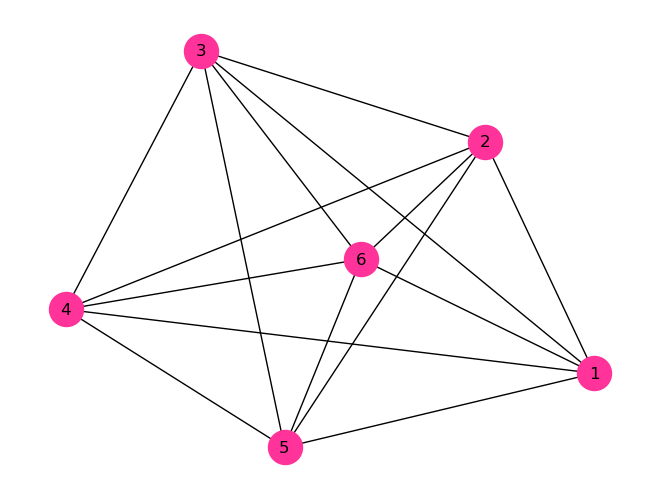

In [3]:
from math import e
from networkx import Graph, draw_kamada_kawai

def probability(delta, t):
    return 100 * e ** (-delta / t)

def reductTemp(t):
    return 0.5 * t


graph = Graph()
graph.add_weighted_edges_from(distances)

draw_kamada_kawai(graph, node_size = 600, node_color="#ff3399", with_labels=True)    
    

In [4]:
from random import randint

def edgeLength(i, j, distances, round_trip = True):
    if round_trip:
        for route in distances:
            if route[0] == i and route[1] == j or route[0] == j and route[1] == i:
                return route[2]
            
    for route in distances:
        if route[0] == i and route[1] == j:
            return route[2]
    print("ERROR: route not found")
    return -1

def routeLength(v, distances):
    out = 0
    
    for i in range(len(v) - 1):
        out += edgeLength(v[i], v[i + 1], distances)
        
    return out

def routeOneReplacement(arr, z, replacementByName = True):
    v = arr.copy()
    if replacementByName:
        v[z[0] - 1], v[z[1] - 1] = v[z[1] - 1], v[z[0] - 1]
        return v
    
    v[z[0]], v[z[1]] = v[z[1]], v[z[0]]
    return v

def chooseRoute(distances, n = 4, v = False, z = False, t = False, p = False):
    
    nodes_num = 0
    for i in range(len(distances)):
        if distances[i][0] > nodes_num:
            nodes_num = distances[i][0]
        if distances[i][1] > nodes_num:
            nodes_num = distances[i][1]
    print("num:", nodes_num) #############
    if not t:
        t = 100
        
    if not p:
        p = [randint(0, 100) for i in range(n)]
    print("p:", p) ###########
        
    if not z:
        z = []
        for i in range(n):
            f = randint(1, nodes_num)
            t = randint(1, nodes_num)
            while t == f:
                t = randint(1, nodes_num)
            z.append((f, t))
    print("z:", z) ###########
        
    if not v:
        v = []
        for i in range(nodes_num):
            temp = randint(1, nodes_num)
            while not temp in v:
                temp = randint(1, nodes_num)
            v.append(temp)
        v.append(v[0])
    print("v:", v) ###############
    
    sum_length = routeLength(v, distances)
    arr_sum = [sum_length]
    
    
    for i in range(n):
        new_v = routeOneReplacement(v, z[i])
        
        new_s = routeLength(new_v, distances)
        arr_sum.append(new_s)
        delta_s = new_s - sum_length
        
        if delta_s > 0:
            
            if probability(delta_s, t) > p[i]:
                v = new_v
                sum_length = new_s
        else:
            v = new_v
            sum_length = new_s
    
        t = reductTemp(t)
        
    return v, arr_sum

def drawRouteGraph(distances, best_route):
    new_distances = []
    
    for i in range(len(best_route) - 1):
        for distance in distances:
            
            if distance[0] == best_route[i] and distance[1] == best_route[i + 1]:
                new_distances.append(distance)
                
            elif distance[1] == best_route[i] and distance[0] == best_route[i + 1]:
                new_distances.append(distance)
            
    graph = Graph()
    graph.add_weighted_edges_from(new_distances)
    draw_kamada_kawai(graph, node_size = 600, node_color="#ff3399", with_labels=True)

num: 6
p: [33, 82, 51, 76]
z: [(3, 4), (4, 6), (5, 2), (6, 2)]
v: [1, 3, 4, 5, 6, 2, 1]
Best route: [1, 6, 5, 4, 3, 2, 1]
Best length: 130
All routes legth: [145, 158, 183, 130, 146]


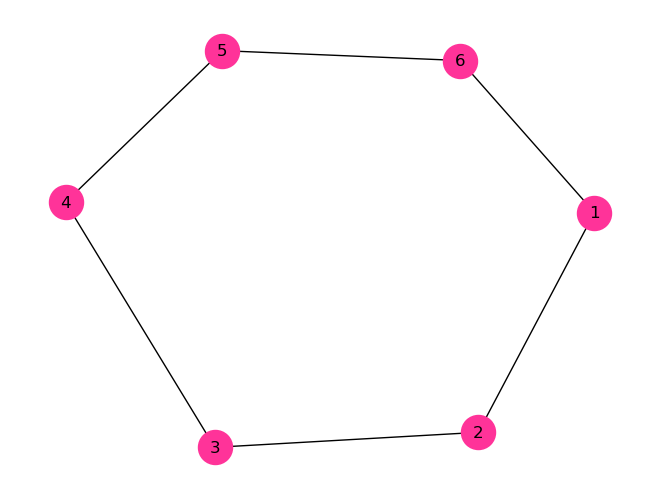

In [5]:
best_route, arr_length = chooseRoute(distances, 4, v, z, t, p)

print(f"Best route: {best_route}")
print(f"Best length: {routeLength(best_route, distances)}")
print(f"All routes legth: {arr_length}")

drawRouteGraph(distances, best_route)